In [23]:
try:
    import numpy as np; import scipy as sc; import matplotlib.pyplot as plt; import uncertainties
except ImportError:
    import sys
    !{sys.executable} -m pip install numpy scipy matplotlib pathlib uncertainties 
    print("Restart your kernel and try again")

## Importing Data

We want to laod data from text based files output from the Xuess machine. These files can be found at the file directory, 

`C:/username/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Xeuss 3_WSU_NSC_Logistics and Data/Xeuss 3 Data/Collins/GIWAXS_ZnPc1`

Now looking at one of these files, we see that there is a header filled with information about the beam and it's energy. The data we care for starts on line 116.

In [24]:
import numpy as np; import matplotlib.pyplot as plt
#Change the run to whatever run number you are on
run = 'GIWAXS_ZnPc1_0_00000'

#Set this to the file path of your data
dpath = 'C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Xeuss 3_WSU_NSC_Logistics and Data/Xeuss 3 Data/Collins/GIWAXS_ZnPc1/'+run
datpath = dpath  + '.dat'
edfpath = dpath  + '.edf'

data = np.loadtxt(datpath, skiprows = 116)
print(data)

[[ 3.05624809e-04  3.07798092e+05  3.02902157e+01]
 [ 9.16874427e-04  2.87506232e+05  2.07003673e+01]
 [ 1.52812404e-03  2.59668357e+05  1.24421079e+01]
 ...
 [ 7.05076434e-01 -5.55396514e-06  9.94893389e-05]
 [ 7.05687684e-01 -5.55438610e-06  1.17726296e-04]
 [ 7.06298933e-01 -5.55483449e-06  1.51996263e-04]]


## Plotting

Moving onto our plotting we can do this either implictly or we can build figures. Documentation on this can be found though the [Matplotlib](https://matplotlib.org/) website. Since we want to use figures, we will use a more expicit method.

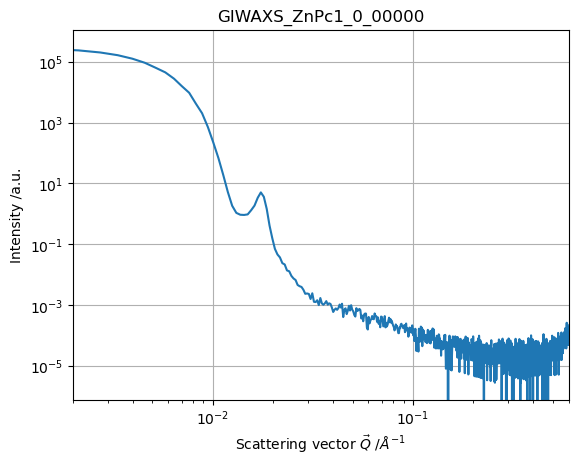

In [25]:
fig1, ax1 = plt.subplots()
ax1.loglog(data[:,0],data[:,1])
ax1.set_xlim(.002,.6)
ax1.set_xlabel(r'Scattering vector $\vec{Q}$ /$\AA^{-1}$ ')
ax1.set_ylabel('Intensity /a.u.')
ax1.set_title(run)
ax1.grid()

Now, if we want to plot the 2d picture, we need do do a couple of other things. We need to be able to read .edf files. Documentation on this file formatting can be found [here](https://www.fieldtriptoolbox.org/getting_started/edf/). To work with this we will use the pyedflib package. 

In [26]:
import pyedflib
import numpy as np
file_name = pyedflib.data.get_generator_filename()
f = pyedflib.EdfReader(edfpath)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))

fig, ax = plt.subplots()

for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)
    ax.plot(f.readsignal(i))
    plt.show
    



OSError: C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Xeuss 3_WSU_NSC_Logistics and Data/Xeuss 3 Data/Collins/GIWAXS_ZnPc1/GIWAXS_ZnPc1_0_00000.edf: the file is not EDF(+) or BDF(+) compliant (it contains format errors)